In [11]:
from phidl import Device, Layer, LayerSet
from phidl.device_layout import DeviceReference
from phidl import quickplot as qp

import phidl.geometry as pg
import phidl.utilities as pu
import phidl.routing as pr
import phidl.path as pp

import numpy as np
import pickle

from dataclasses import dataclass, field, replace

from typing import Tuple, Optional

import itertools

In [12]:
import importlib

from components import utils
importlib.reload(utils)

from components import default_layerset
importlib.reload(default_layerset)
from components import junction_two_wire
importlib.reload(junction_two_wire)
from components import junction_four_wire
importlib.reload(junction_four_wire)
from components import squid_two_wire
importlib.reload(squid_two_wire)
from components import squid_four_wire
importlib.reload(squid_four_wire)
from components import double_square_spiral_two_wire
importlib.reload(double_square_spiral_two_wire)
from components import junction_squid_resistor
importlib.reload(junction_squid_resistor)
from components import squid_resistor
importlib.reload(squid_resistor)
from components import junction_resistor
importlib.reload(junction_resistor)

from components import squid
importlib.reload(squid)
from components import junction
importlib.reload(junction)
from components import resistor
importlib.reload(resistor)


from components.default_layerset import default_ls, ebeam_test_doses, undercut_test_doses, ebeam_log_test_doses, undercut_log_test_doses
from components.junction import JJ, JJParams
from components.resistor import Resistor, ResParams
from components.squid import Squid, SquidParams

from components.junction_two_wire import JJ2Wire, PadParams
from components.junction_four_wire import JJ4Wire
from components.squid_two_wire import Squid2Wire
from components.squid_four_wire import Squid4Wire
from components.resistor_two_wire import Resistor2Wire
from components.junction_squid_resistor import JJSquidResistor, CapaParams
from components.squid_resistor import SquidResistor
from components.junction_resistor import JJResistor
from components.double_square_spiral_two_wire import DoubleSquareSpiral2Wire, SquareSpiralParams, DoubleSquareSpiral
from components.utils import WritefieldParams

In [13]:
# 3 junctions 
length = 30
list_jj_params = [JJParams(total_length=length),
                  JJParams(bridge_width=0.4, jj_width=0.2, total_length=length),
                  JJParams(bridge_width=0.3, jj_width=0.28, arm_width=0.28, total_length=length)]


# 3 squids
length = 40
loop_size = 15
list_squid_params = [SquidParams(total_length=length, loop_height=loop_size, island_width=loop_size),
                     SquidParams(bridge_width=0.4, jj_width=0.2, total_length=length, loop_height=loop_size, island_width=loop_size), 
                     SquidParams(bridge_width=0.3, jj_width=0.28, arm_width=0.28, total_length=length, loop_height=loop_size, island_width=loop_size)]

writefield_params = WritefieldParams()

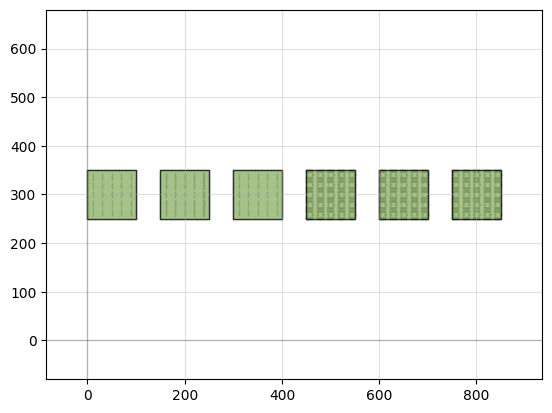

In [14]:
# ebeam dose test

Dose_Test_JJs: list[Device] = []

# junctions
for jj_params in list_jj_params:
    Undercut_Dose_Test_JJs: list[Device] = []

    for i,dose in enumerate(ebeam_test_doses):
        JJs: list[Device] = []

        for j,undercut_dose in enumerate(undercut_test_doses):

            
                dose_test_jj = JJ()
                dose_test_jj_params = replace(jj_params)
                dose_test_jj_params.layer = default_ls[f'ebeam_test_{i}']
                dose_test_jj_params.undercut_layer = default_ls[f'undercut_test_{j}']
                dose_test_jj_params.total_length = 15

                dose_test_jj.generate_jj(dose_test_jj_params)
                JJs.append(dose_test_jj.device)

        Undercut_Dose_Test_JJs.append(utils.pack_devices_x(JJs, spacing=18))

    Dose_Test_JJs.append(utils.pack_devices_y(Undercut_Dose_Test_JJs, spacing=3))
    utils.add_writefield(writefield_params, Dose_Test_JJs[-1])
    


Dose_Test_Squids: list[Device] = []

# squids
for squid_params in list_squid_params:
    Undercut_Dose_Test_Squids: list[Device] = []

    for i,dose in enumerate(ebeam_test_doses):
        Squids: list[Device] = []

        for j,undercut_dose in enumerate(undercut_test_doses):

            
                dose_test_squid = Squid()
                dose_test_squid_params = replace(squid_params)
                dose_test_squid_params.layer = default_ls[f'ebeam_test_{i}']
                dose_test_squid_params.jj_undercut_layer = default_ls[f'undercut_test_{j}']
                dose_test_squid_params.connectors = False
                dose_test_squid_params.island_width = 11
                dose_test_squid_params.loop_height = 13.5

                dose_test_squid.generate_squid(dose_test_squid_params)
                Squids.append(dose_test_squid.device)

        Undercut_Dose_Test_Squids.append(utils.pack_devices_x(Squids, spacing=9))

    Dose_Test_Squids.append(utils.pack_devices_y(Undercut_Dose_Test_Squids, spacing=3))
    utils.add_writefield(writefield_params, Dose_Test_Squids[-1])
    
Dose_Test = utils.pack_devices_x(Dose_Test_JJs + Dose_Test_Squids)

Dose_Test.movey(300)

qp(Dose_Test)


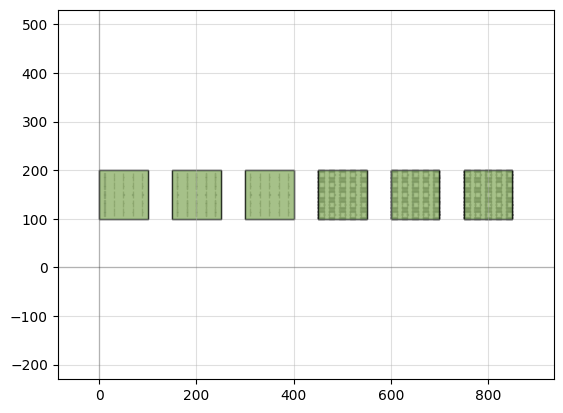

In [15]:
# ebeam dose test

Dose_Test_JJs: list[Device] = []

# junctions
for jj_params in list_jj_params:
    Undercut_Dose_Test_JJs: list[Device] = []

    for i,dose in enumerate(ebeam_log_test_doses):
        JJs: list[Device] = []

        for j,undercut_dose in enumerate(undercut_log_test_doses):

            
                dose_test_jj = JJ()
                dose_test_jj_params = replace(jj_params)
                dose_test_jj_params.layer = default_ls[f'ebeam_log_test_{i}']
                dose_test_jj_params.undercut_layer = default_ls[f'undercut_log_test_{j}']
                dose_test_jj_params.total_length = 15

                dose_test_jj.generate_jj(dose_test_jj_params)
                JJs.append(dose_test_jj.device)

        Undercut_Dose_Test_JJs.append(utils.pack_devices_x(JJs, spacing=18))

    Dose_Test_JJs.append(utils.pack_devices_y(Undercut_Dose_Test_JJs, spacing=3))
    utils.add_writefield(writefield_params, Dose_Test_JJs[-1])
    


Dose_Test_Squids: list[Device] = []

# squids
for squid_params in list_squid_params:
    Undercut_Dose_Test_Squids: list[Device] = []

    for i,dose in enumerate(ebeam_log_test_doses):
        Squids: list[Device] = []

        for j,undercut_dose in enumerate(undercut_log_test_doses):

            
                dose_test_squid = Squid()
                dose_test_squid_params = replace(squid_params)
                dose_test_squid_params.layer = default_ls[f'ebeam_log_test_{i}']
                dose_test_squid_params.jj_undercut_layer = default_ls[f'undercut_log_test_{j}']
                dose_test_squid_params.connectors = False
                dose_test_squid_params.island_width = 11
                dose_test_squid_params.loop_height = 13.5

                dose_test_squid.generate_squid(dose_test_squid_params)
                Squids.append(dose_test_squid.device)

        Undercut_Dose_Test_Squids.append(utils.pack_devices_x(Squids, spacing=9))

    Dose_Test_Squids.append(utils.pack_devices_y(Undercut_Dose_Test_Squids, spacing=3))
    utils.add_writefield(writefield_params, Dose_Test_Squids[-1])
    
Log_Dose_Test = utils.pack_devices_x(Dose_Test_JJs + Dose_Test_Squids)

Log_Dose_Test.movey(150)

qp(Log_Dose_Test)


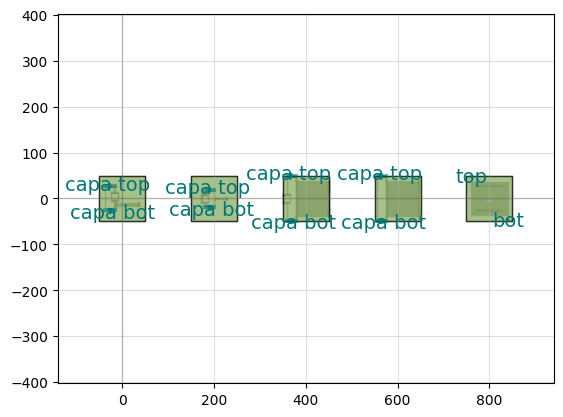

In [16]:
Device_Test = Device('Test Devices')

jj_params = JJParams()
squid_params = SquidParams(loop_height=15, total_length=25)
res_params = ResParams(num_segments=4, spacing=2.1, adaptive_spacing=False, connector_width=3) #400kOhm
capa_params = CapaParams()

jj_squid_resistor = JJSquidResistor()
jj_squid_resistor.generate_junction_squid_resistor(jj_params, squid_params, res_params, capa_params, writefield_params)

Junction_Squid_Resistor_ref = Device_Test << jj_squid_resistor.device
Junction_Squid_Resistor_ref.move(origin=Junction_Squid_Resistor_ref.center, destination=(0,0))

squid_params = SquidParams(bridge_width = 0.3, jj_width=0.28, arm_width=0.28)
capa_params = CapaParams(length_y=15)

res_params = ResParams(num_segments=2, segment_length=25) #100kOhm

squid_resistor = SquidResistor()
squid_resistor.generate_squid_resistor(res_params, squid_params, capa_params, writefield_params)

Squid_Resistor_ref = Device_Test << squid_resistor.device
Squid_Resistor_ref.move(origin=Squid_Resistor_ref.center, destination=(200,0))

squid_params = SquidParams()
capa_params = CapaParams()
res_params = ResParams(num_segments=36, segment_length=69, spacing=2.1)

squid_resistor = SquidResistor()
squid_resistor.generate_squid_resistor(res_params, squid_params, capa_params, writefield_params)

Squid_BigResistor_ref = Device_Test << squid_resistor.device
Squid_BigResistor_ref.move(origin=Squid_BigResistor_ref.center, destination=(400,0))

jj_params = JJParams()

jj_resistor = JJResistor()
jj_resistor.generate_junction_resistor(res_params, jj_params, capa_params, writefield_params)

Junction_Resistor_ref = Device_Test << jj_resistor.device
Junction_Resistor_ref.move(origin=Junction_Resistor_ref.center, destination=(600,0))

spiral_params = SquareSpiralParams(connector_length=8, num_turns=8)
square_spiral = DoubleSquareSpiral()
square_spiral.generate_double_square_spiral(spiral_params)
utils.add_writefield(writefield_params, square_spiral.device)

Square_Spiral_ref = Device_Test << square_spiral.device

Square_Spiral_ref.move(origin=Square_Spiral_ref.center, destination=(800,0))

qp(Device_Test)

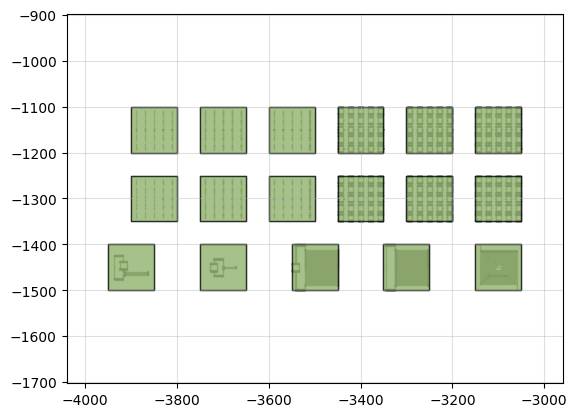

In [17]:
Ebeam_dosetest = Device('Ebeam dose test')

Ebeam_dosetest << Dose_Test
Ebeam_dosetest << Log_Dose_Test
Device_Test_ref = Ebeam_dosetest << Device_Test

Device_Test_ref.movey(0)

Ebeam_dosetest.move(origin=Ebeam_dosetest.center, destination=(-3500,-1300))

qp(Ebeam_dosetest)

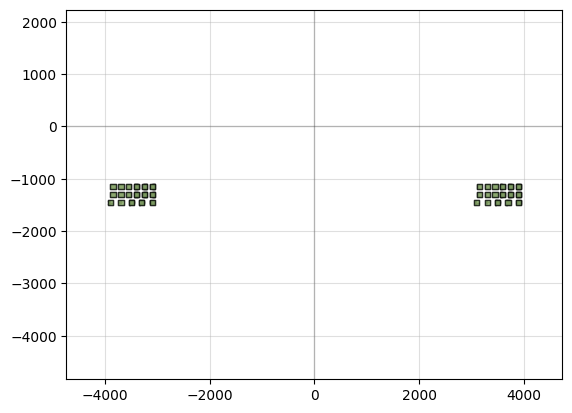

In [18]:
Full_Dosetest = Device('full ebeam dose test')

Left_Dosetest = Full_Dosetest << Ebeam_dosetest

Right_Dosetest = Full_Dosetest << Ebeam_dosetest

Right_Dosetest.move(origin=Right_Dosetest.center, destination=(3500, -1300))

qp(Full_Dosetest)

In [19]:
Full_Dosetest.write_gds('Ebeam_dosetest.gds')

'Ebeam_dosetest.gds'

In [21]:
exposition_layers = [default_ls['ebeam'], default_ls['ebeam_low'], default_ls['ebeam_high'], 
                     default_ls['undercut'], default_ls['jj_undercut']]

for i, ebeam_dose in enumerate(default_layerset.ebeam_test_doses):
    exposition_layers.append(default_ls[f'ebeam_test_{i}'])

for i, undercut_dose in enumerate(default_layerset.undercut_test_doses):
    exposition_layers.append(default_ls[f'undercut_test_{i}'])

for i, ebeam_dose in enumerate(default_layerset.ebeam_log_test_doses):
    exposition_layers.append(default_ls[f'ebeam_log_test_{i}'])

for i, undercut_dose in enumerate(default_layerset.undercut_log_test_doses):
    exposition_layers.append(default_ls[f'undercut_log_test_{i}'])


#example gds path: D:\Alex\Ebeam litho\QRCSJ_R7\Run 2\QRCSJ_R7_v2.gds

utils.write_position_list("ebeam_dosetest_positionlist",
                          "D:\Alex\Ebeam litho\QRCSJ_2\Run 2\Ebeam_dosetest.gds",
                          Full_Dosetest,
                          [default_ls['writefield_ebeam']],
                          [default_ls['working_area_ebeam']],
                          exposition_layers)